<h2>An&aacute;lisis Exploratorio de Datos (EDA) de Instacart</h2>
<h3>Objetivo</h3>
<p>Explorar los conjuntos de datos para entender c&oacute;mo los clientes compran productos e identificar tendencias mediante m&eacute;todos de exploraci&oacute;n y visualizaci&oacute;n de datos.</p>
<h3>Contenido</h3>
<ol>
<li>Importaci&oacute;n de bibliotecas y conjuntos de datos</li>
<li>Descripci&oacute;n general de los datos</li>
<li>Preparaci&oacute;n de los datos</li>
<li>An&aacute;lisis exploratorio de datos</li>
</ol>

<h3>Importaci&oacute;n de Bibliotecas y Conjuntos de Datos</h3>
<p>El primer paso es importar las bibliotecas y conjuntos de datos.</p>
<p><strong>Bibliotecas:</strong> pandas, matplotlib, seaborn<br /> <strong>Conjuntos de Datos:</strong> aisles, departments, order_products, orders, products</p>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta base
ruta_base = r'C:\Users\cesar\OneDrive\Escritorio\Portafolio Github\Sprint 2'

# Carga los archivos CSV
orders = pd.read_csv(rf'{ruta_base}\instacart_orders.csv', sep=';')
products = pd.read_csv(rf'{ruta_base}\products.csv', sep=';')
aisles = pd.read_csv(rf'{ruta_base}\aisles.csv', sep=';')
departments = pd.read_csv(rf'{ruta_base}\departments.csv', sep=';')
order_products = pd.read_csv(rf'{ruta_base}\order_products.csv', sep=';')

# Resumen de uno de los DataFrames para verificar que se cargó correctamente
print(orders.head())



   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [11]:
orders.info(show_counts=True)
products.info()
aisles.info()
departments.info()
order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage:

<h3>Conclusiones Iniciales</h3>
<ul>
<li><strong>orders:</strong>&nbsp;28,819 valores faltantes en la columna 'days_since_prior_order'.</li>
<li><strong>products:</strong>&nbsp;1,258 valores faltantes en la columna 'product_name'.</li>
<li><strong>aisles:</strong>&nbsp;No hay datos faltantes.</li>
<li><strong>departments:</strong>&nbsp;No hay datos faltantes.</li>
<li><strong>order_products:</strong>&nbsp;836 valores faltantes en la columna 'add_to_cart_order'.</li>
</ul>

<h3>Preparaci&oacute;n de los Datos</h3>
<p>Los siguientes pasos son preparar los datos para el an&aacute;lisis.</p>
<h4>Paso 1: Encontrar y eliminar cualquier dato duplicado de los conjuntos de datos</h4>

In [15]:
# Verificar duplicados en orders
orders.duplicated().sum()

# Eliminar duplicados en orders
orders = orders.drop_duplicates()
orders.duplicated().sum()
orders['order_id'].duplicated().sum()


0

<h4>Paso 2: Eliminar cualquier dato faltante de los conjuntos de datos.</h4>

In [26]:
# Verificar y eliminar valores faltantes en products
products['product_name'] = products['product_name'].fillna('Unknown')
products.isnull().sum()

# Verificar y eliminar valores faltantes en orders
orders[orders['days_since_prior_order'].isnull() & (orders['order_number'] > 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


<h3>Conclusi&oacute;n de la Preparaci&oacute;n de Datos</h3>
<p>Hemos eliminado 15 valores duplicados de la tabla <code data-code-tools="">orders</code> y 1361 valores duplicados de la tabla <code data-code-tools="">products</code> (despu&eacute;s de reformatear la columna <code data-code-tools="">product_name</code>). Adem&aacute;s, hemos reemplazado los valores faltantes en <code data-code-tools="">products</code> y <code data-code-tools="">orders</code> con 'Unknown' y 999, respectivamente.</p>

<h2>An&aacute;lisis Exploratorio de Datos</h2>

<h4> Verificar que los valores de 'order_hour_of_day' y 'order_dow' en la tabla de pedidos sean sensatos</h4>

In [32]:
orders['order_hour_of_day'].value_counts().sort_index()
orders['order_dow'].value_counts().sort_index()

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64

<ul>
<li><strong>order_hour_of_day</strong>: Rango de 0 a 23</li>
<li><strong>order_dow</strong>: Rango de 0 a 6</li>
</ul>

<ul>
<li>
<h4> &iquest;A qu&eacute; hora del d&iacute;a compran las personas alimentos?</h4>
</li>
</ul>

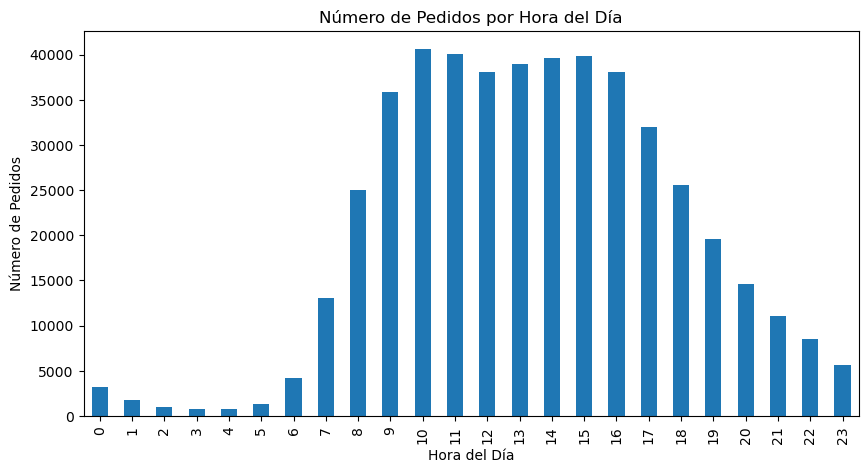

In [38]:
# Graficar pedidos por hora del día
orders['order_hour_of_day'].value_counts().sort_index().plot.bar(figsize=(10, 5))
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos por Hora del Día')
plt.show()

<ul>
<li><strong>Conclusi&oacute;n</strong>: El momento m&aacute;s popular para comprar alimentos es entre las 10 a.m. y las 4 p.m. Por la noche, rara vez se realizan pedidos.</li>
</ul>
<h4> &iquest;Qu&eacute; d&iacute;a de la semana compran las personas alimentos?</h4>

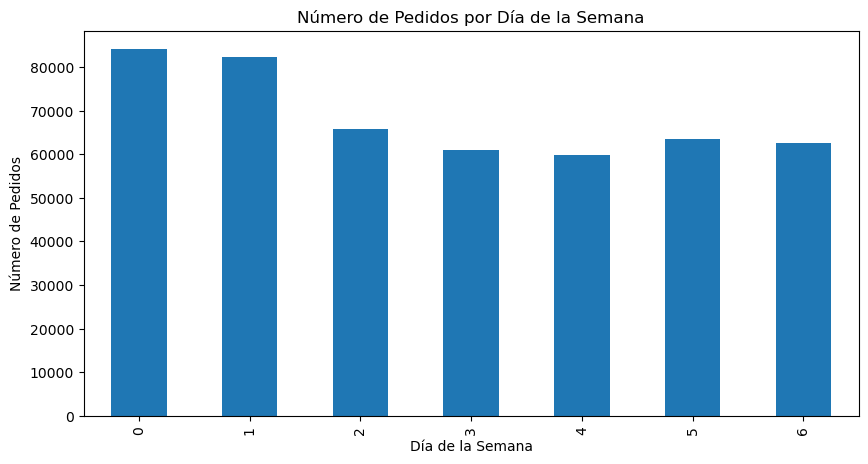

In [43]:
# Graficar pedidos por día de la semana
orders['order_dow'].value_counts().sort_index().plot.bar(figsize=(10, 5))
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos por Día de la Semana')
plt.show()


<p><strong>Conclusi&oacute;n</strong>: Los d&iacute;as m&aacute;s populares para comprar alimentos son el domingo y el lunes. El mi&eacute;rcoles y jueves son los menos populares.</p>

<h4> &iquest;Cu&aacute;nto tiempo esperan las personas antes de realizar otro pedido?</h4>

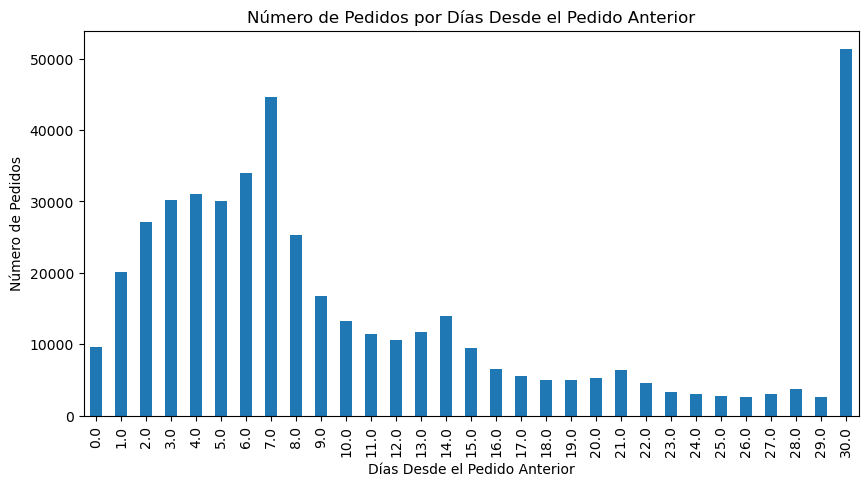

In [47]:
# Encontrar el mínimo, máximo y promedio de días desde el pedido anterior
orders['days_since_prior_order'].min(), orders['days_since_prior_order'].max(), orders['days_since_prior_order'].mean()

# Graficar la distribución
orders['days_since_prior_order'].value_counts().sort_index().plot.bar(figsize=(10, 5))
plt.xlabel('Días Desde el Pedido Anterior')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos por Días Desde el Pedido Anterior')
plt.show()


<p><strong>Conclusi&oacute;n</strong>: Muchos clientes esperan 7 d&iacute;as o menos antes de realizar otro pedido. El tiempo promedio de espera es de aproximadamente 11 d&iacute;as.</p>

[B1] ¿Hay una diferencia en las distribuciones de 'order_hour_of_day' los miércoles y sábados?

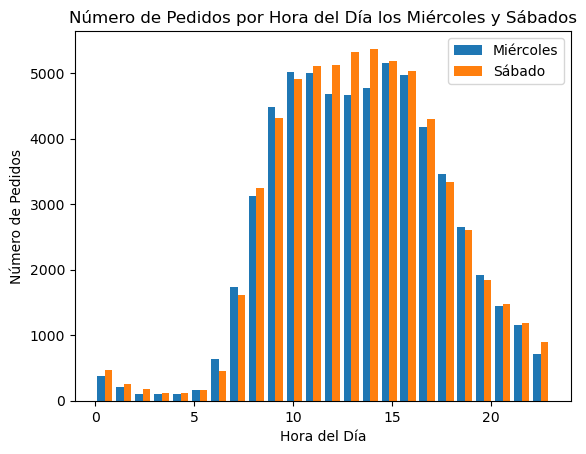

In [55]:
# Graficar miércoles vs sábado
plt.hist(
    [orders[orders['order_dow'] == 3]['order_hour_of_day'], orders[orders['order_dow'] == 6]['order_hour_of_day']],
    bins=24,
    label=['Miércoles', 'Sábado']
)
plt.legend()
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos por Hora del Día los Miércoles y Sábados')
plt.show()


<p><strong>Conclusi&oacute;n</strong>: El n&uacute;mero de pedidos es aproximadamente el mismo, pero al mediod&iacute;a del s&aacute;bado los pedidos aumentan.</p>

<h3>[B2] &iquest;Cu&aacute;l es la distribuci&oacute;n del n&uacute;mero de pedidos por cliente?</h3>

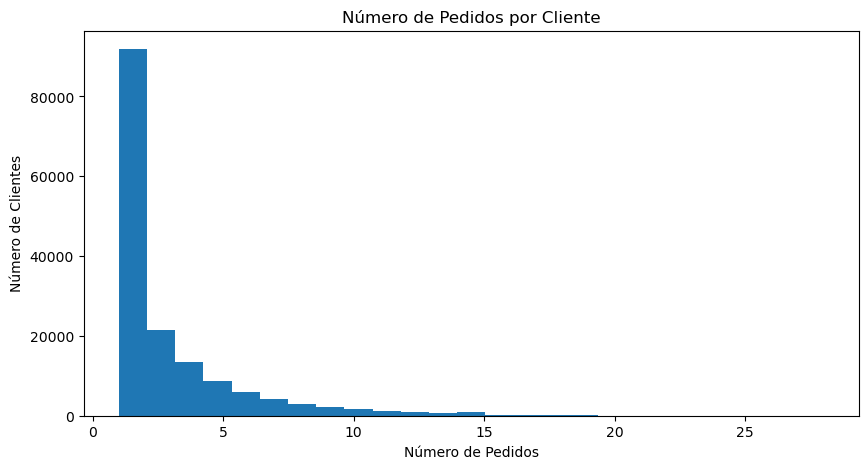

15.577570710824013

In [66]:
# Graficar la distribución
orders.groupby('user_id')['order_id'].nunique().plot.hist(bins=25, figsize=(10, 5))
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.title('Número de Pedidos por Cliente')
plt.show()

# Mostrar los 5 primeros valores
orders.groupby('user_id')['order_number'].max().value_counts().head(5)

# Promedio
orders.groupby('user_id')['order_number'].max().mean()


<p><strong>Conclusi&oacute;n</strong>: La distribuci&oacute;n est&aacute; sesgada a la derecha. Los 5 principales n&uacute;meros de pedidos por cliente son 4, 3, 5, 6 y 2. El promedio es de 15 pedidos.</p>

<h3> &iquest;Cu&aacute;les son los 20 productos m&aacute;s populares (mostrar su id y nombre)?</h3>

In [72]:
# Unir los dataframes
merged_products = pd.merge(order_products, products, on='product_id', how='left')

# Encontrar el conteo de product_name
merged_products.groupby(['product_name', 'product_id'])['product_name'].count().sort_values(ascending=False).head(20)


product_name              product_id
Banana                    24852         66050
Bag of Organic Bananas    13176         53297
Organic Strawberries      21137         37039
Organic Baby Spinach      21903         33971
Organic Hass Avocado      47209         29773
Organic Avocado           47766         24689
Large Lemon               47626         21495
Strawberries              16797         20018
Limes                     26209         19690
Organic Whole Milk        27845         19600
Organic Raspberries       27966         19197
Organic Yellow Onion      22935         15898
Organic Garlic            24964         15292
Organic Zucchini          45007         14584
Organic Blueberries       39275         13879
Cucumber Kirby            49683         13675
Organic Fuji Apple        28204         12544
Organic Lemon             5876          12232
Apple Honeycrisp Organic  8277          11993
Organic Grape Tomatoes    40706         11781
Name: product_name, dtype: int64

<p><strong>Conclusi&oacute;n</strong>: Los 5 productos principales son bananas, bolsa de bananas org&aacute;nicas, fresas org&aacute;nicas, espinaca beb&eacute; org&aacute;nica y aguacate hass org&aacute;nico. Los 20 principales son una mezcla de frutas y verduras.</p>

<h3>&iquest;Cu&aacute;ntos art&iacute;culos compran t&iacute;picamente las personas en un pedido? &iquest;C&oacute;mo es la distribuci&oacute;n?</h3>

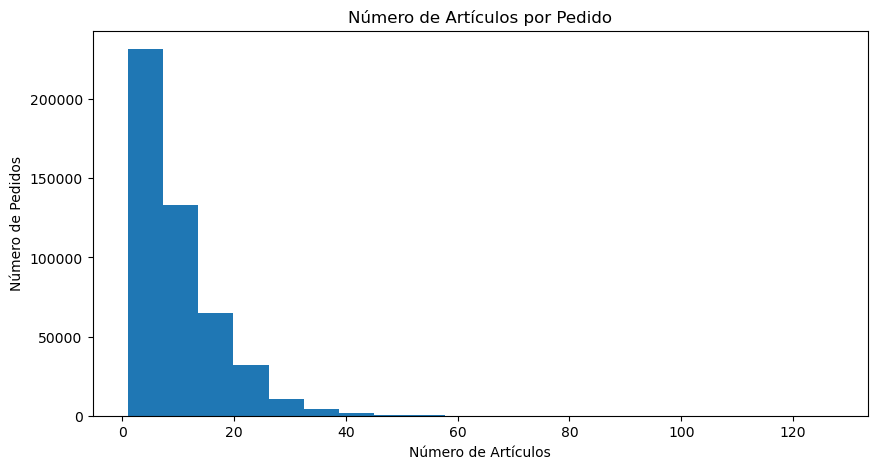

In [98]:
# Unir los dataframes
order_frequency = pd.merge(orders, order_products, on='order_id', how='left')
order_frequency.reset_index()

# Calcular la media
order_frequency['order_id'].value_counts().mean()

# Graficar la distribución
order_frequency['order_id'].value_counts().plot.hist(bins=20, figsize=(10, 5))
plt.xlabel('Número de Artículos')
plt.ylabel('Número de Pedidos')
plt.title('Número de Artículos por Pedido')
plt.show()


<p><strong>Conclusi&oacute;n</strong>: La media de art&iacute;culos por pedido es aproximadamente 9.5.</p>

<h3>&iquest;Cu&aacute;les son los 20 art&iacute;culos que se reordenan con m&aacute;s frecuencia (mostrar sus nombres e IDs)?</h3>

In [106]:
# Sumar los reordenes
merged_products.groupby(['product_name', 'product_id'])['reordered'].sum().sort_values(ascending=False).head(20)


product_name              product_id
Banana                    24852         55763
Bag of Organic Bananas    13176         44450
Organic Strawberries      21137         28639
Organic Baby Spinach      21903         26233
Organic Hass Avocado      47209         23629
Organic Avocado           47766         18743
Organic Whole Milk        27845         16251
Large Lemon               47626         15044
Organic Raspberries       27966         14748
Strawberries              16797         13945
Limes                     26209         13327
Organic Yellow Onion      22935         11145
Organic Garlic            24964         10411
Organic Zucchini          45007         10076
Cucumber Kirby            49683          9538
Organic Fuji Apple        28204          8989
Apple Honeycrisp Organic  8277           8836
Organic Blueberries       39275          8799
Organic Lemon             5876           8412
Organic Half & Half       49235          8389
Name: reordered, dtype: int64

<p><strong>Conclusi&oacute;n</strong>: Los art&iacute;culos m&aacute;s reordenados son similares a los productos m&aacute;s populares, liderados por bananas.</p>

<h3>Para cada producto, &iquest;qu&eacute; proporci&oacute;n de sus pedidos son reordenes?</h3>

In [115]:
# Unir los dataframes
product_reorder = pd.merge(order_products, products, on='product_id', how='left')

# Calcular la media
product_reorder.groupby(['product_id', 'product_name'])['reordered'].mean()


product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Conclusión: La proporción de reordenes varía por producto, con algunos productos siendo reordenados más del 70% de las veces.

<h3>&nbsp;&iquest;Cu&aacute;les son los 20 art&iacute;culos que las personas colocan primero en sus carritos?</h3>

In [136]:
# Contar el add_to_cart_order
merged_products = merged_products[merged_products['add_to_cart_order'] == 1]
merged_products.groupby(['product_id', 'product_name'])['add_to_cart_order'].count().sort_values(ascending=False)



product_id  product_name                                               
24852       Banana                                                         15562
13176       Bag of Organic Bananas                                         11026
27845       Organic Whole Milk                                              4363
21137       Organic Strawberries                                            3946
47209       Organic Hass Avocado                                            3390
                                                                           ...  
10981       Cloud White Decorating Cupcake Icing                               1
10985       Premium Twin Pack Rock Cornish Game Hen                            1
38272       Organic Raw Coconut Flour                                          1
10989       Garbage Disposal Freshener & Cleaner Red Pear with Magnolia        1
36996       Cool Sport Spray-On Sunscreen SPF 50                               1
Name: add_to_cart_order, Length: 2676

Conclusión: Las bananas y otros productos frescos son frecuentemente los primeros en ser añadidos al carrito.